# Proyek Analisis Data: Bike Sharing Dataset

## Nama : Irsyad Muhamad Firdaus
## Email : irsyad.muhf@gmail.com
## ID Dicoding : irsydmuhf

## Menentukan pertanyaan bisnis

 1. Pada jam berapa penyewa paling banyak menyewa sepeda pada hari tertentu?
 2. Bagaimana pengaruh musim(season) terhadap tren penyewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## DATA WRANGLING

### Gathering Data

In [17]:
day_df = pd.read_csv("./data/day.csv")
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


- Pada tabel day_df terdapat banyaknya 731 baris dan terdiri dari 16 kolom yang berisi tentang data penyewaan sepeda, mulai dari tanggal(dteday), jumlah sewa per hari(cnt), hingga kondisi alam seperti cuaca, musim, suhu, kelembapan, dan lain lain.

In [18]:
hour_df = pd.read_csv("./data/hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


- Pada tabel day_df terdapat banyaknya 17379 baris dan terdiri dari 17 kolom yang berisi tentang data penyewaan sepeda, mulai dari jam sewa, tanggal(dteday), jumlah sewa per hari(cnt), hingga kondisi alam seperti cuaca, musim, suhu, kelembapan, dan lain lain.

**Insight:**
- Tabel day_df dan hour_df berisi mengenai jumlah penyewa sepeda pada rentang waktu tertentu dan dalam kondisi cuaca tertentu.
- Tabel day_df berisi tren harian, sedangkan hour_df adalah tren dalam satu hari dilihat dari adanya kolom hr(hour).

## Assessing Data

In [19]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [20]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [21]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [22]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Pada info tabel day_df dan hour_df di atas kita tidak melihat adanya missing value
- Dapat kita lihat juga tidak ada duplikasi pada kedua tabel tersebut
- Tetapi kita melihat adanya anomali tipedata untuk kolom dteday pada kedua tabel

## DATA CLEANING

In [23]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

- Code di atas untuk mengubah tipedata dteday yang tadinya object menjadi datetime

In [24]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

- Code di atas untuk mengubah tipedata dteday yang tadinya object menjadi datetime

**Insight:**
- Kolom yang tadinya bertipe data object (dteday) sudah berubah menjadi datetime, sesuai dengan isi kolomnya.

## Exploratory Data Analysis (EDA)

In [25]:
all_df = pd.merge(hour_df, day_df, on="dteday", suffixes=("_hour", "_day"))
all_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


- Kode di atas berfungsi untuk menggaungkan 2 tabel yang kita pilih, berdasarkan (on) dteday nya dan suffixes berfungsi untuk menambahkan _hour pada tiap kolom di tabel hour_df dan _day pada tiap kolom di tabel day_df

In [26]:
all_df.describe(include="all")

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,3.003683,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,3.000000,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,5.000000,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,...,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,...,2.005771,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947


In [27]:
all_df = all_df.drop(columns=["instant_hour", "instant_day", "season_hour", 
                                    "temp_day", "atemp_day", "hum_day", 
                                    "windspeed_day", "holiday_day", "weekday_day", 
                                    "workingday_day", "weathersit_day", 
                                    "casual_day", "registered_day", "cnt_day"])

- Karena ukuran dataframe terlalu besar dan banyak kolom yang sudah diperinci seperti cnt_day, sudah lebih terperinci di cnt_hour.

**Insight:**
- Terlihat pada kolom hr menunjukkan bahwa rata-rata pengunjung per hari adalah sekitar 4563. Namun jika dilihat dari standar deviasinya (6,9) menunjukkan sebaran jam yang cukup luas sehingga perlu adanya analisis lebih lanjut.
- Terlihat pada kolom season bahwa musim yang memiliki jumlah pengunjung tinggi ada pada musim ke 3 atau Fall.


In [28]:
all_df.head(100)

,dteday,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour,season_day,yr_day,mnth_day
0,2011-01-01,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,1,0,1
1,2011-01-01,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,1,0,1
2,2011-01-01,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,1,0,1
3,2011-01-01,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,1,0,1
4,2011-01-01,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2011-01-05,0,1,4,0,3,1,1,0.24,0.2273,0.48,0.2239,0,2,2,1,0,1
96,2011-01-05,0,1,5,0,3,1,1,0.22,0.2273,0.47,0.1642,0,3,3,1,0,1
97,2011-01-05,0,1,6,0,3,1,1,0.20,0.1970,0.47,0.2239,0,33,33,1,0,1
98,2011-01-05,0,1,7,0,3,1,1,0.18,0.1818,0.43,0.1940,1,87,88,1,0,1


**Insight:**
- Jawaban Pertanyaan 1: Rata-rata penyewaan tertinggi teradapat di sore hari sekitar jam 5 yaitu sekitar 461 penyewa per jam, kemudian jam 6 sore dengan 425 penyewa, kemudian jam 8 pagi dengan 359 penyewa.
- Jawaban Pertanyaan 2: Musim Gugur memiliki rata-rata pengguna sepeda tertinggi, sedangkan Musim Semi memiliki rata-rata terendah.
- Dari mana kita bisa melihat angka 1, 2, 3, dan 4 mewakili musim apa? Selain dari siklus musim berdasarkan tanggal, pemilik data juga menyertakan keterangan terseut di file README


## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [14]:
all_df.groupby("hr")["cnt_hour"].mean().sort_values(ascending=False)

hr
17    461.452055
18    425.510989
8     359.011004
16    311.983562
19    311.523352
13    253.661180
12    253.315934
15    251.233196
14    240.949246
20    226.030220
9     219.309491
7     212.064649
11    208.143054
10    173.668501
21    172.314560
22    131.335165
23     87.831044
6      76.044138
0      53.898072
1      33.375691
2      22.869930
5      19.889819
3      11.727403
4       6.352941
Name: cnt_hour, dtype: float64

In [30]:
hourly_trend_df = all_df.groupby("hr")["cnt_hour"].mean()
hourly_trend_df.sort_values(ascending=False)

hr
17    461.452055
18    425.510989
8     359.011004
16    311.983562
19    311.523352
13    253.661180
12    253.315934
15    251.233196
14    240.949246
20    226.030220
9     219.309491
7     212.064649
11    208.143054
10    173.668501
21    172.314560
22    131.335165
23     87.831044
6      76.044138
0      53.898072
1      33.375691
2      22.869930
5      19.889819
3      11.727403
4       6.352941
Name: cnt_hour, dtype: float64

- Pembuatan tabel hourly_trend_df untuk memudahkan viusalisasi data. Tabel tersebut berisi jumlah penyewaan berdasarkan jam

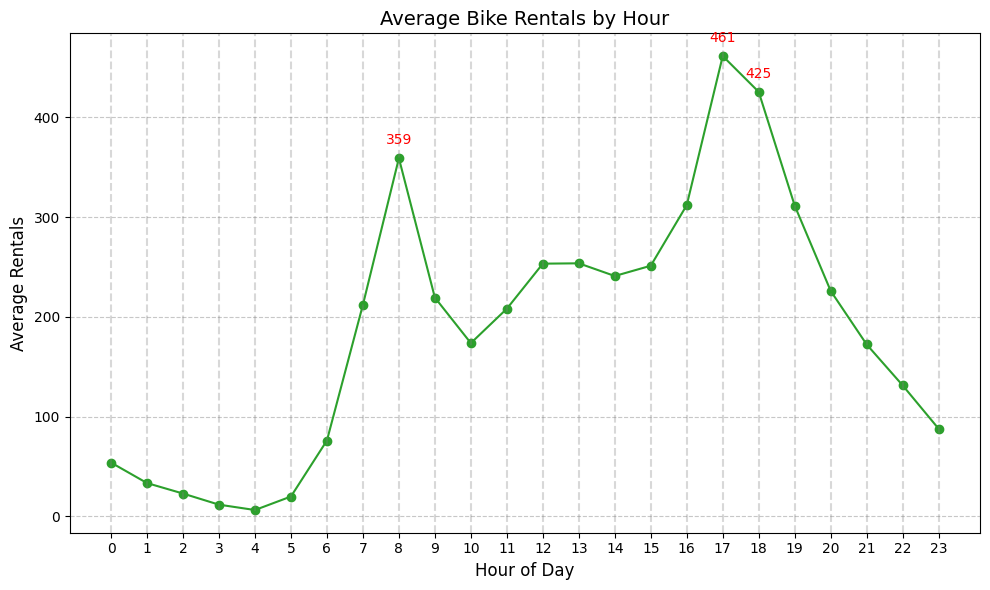

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(hourly_trend_df.index, hourly_trend_df, marker="o", linestyle="-", color="#2ca02c")

for hour in hourly_trend_df.index:
    plt.axvline(x=hour, color='gray', linestyle='--', alpha=0.3)

plt.title("Average Bike Rentals by Hour", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Average Rentals", fontsize=12)
plt.xticks(ticks=range(0, 24), fontsize=10)  # Show all hours
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

peak_hours = [17, 18, 8]
for hour in peak_hours:
    plt.annotate(f"{int(hourly_trend_df[hour])}", 
                 (hour, hourly_trend_df[hour]), 
                 textcoords="offset points", 
                 xytext=(0, 10), ha='center', fontsize=10, color="red")

plt.tight_layout()
plt.show()


- Dengan menambahkan anotasi pada 3 puncak tertinggi, memudahkan kita membaca grafik

### Pertanyaan 2:

In [32]:
all_df.groupby("season_day")["cnt_hour"].mean()

season_day
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: cnt_hour, dtype: float64

In [33]:
seasonal_trend_df = all_df.groupby("season_day")["cnt_hour"].mean()
seasonal_trend_df.sort_values(ascending=False)

season_day
3    236.016237
2    208.344069
4    198.868856
1    111.114569
Name: cnt_hour, dtype: float64

- Pembuatan tabel seasonal_trend_df untuk memudahkan viusalisasi data. Tabel tersebut berisi jumlah penyewaan berdasarkan musim(season)

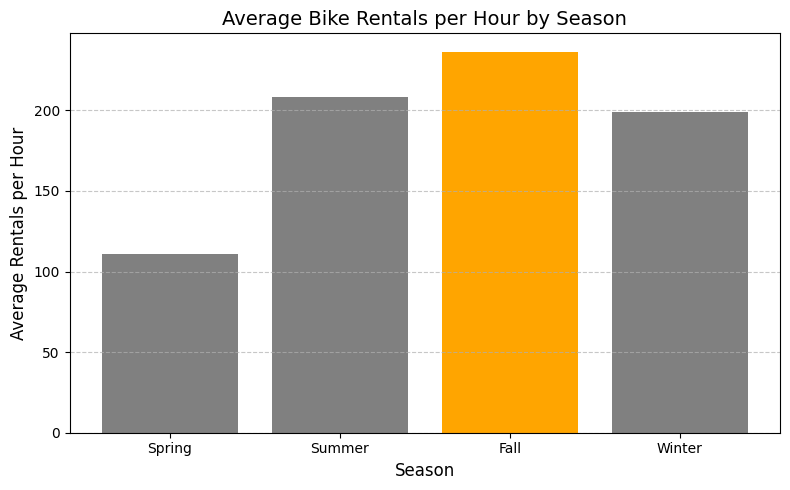

In [34]:
season_labels = ["Spring", "Summer", "Fall", "Winter"]

plt.figure(figsize=(8, 5))
plt.bar(season_labels, seasonal_trend_df, color=["grey", "grey", "orange", "grey"])
plt.title("Average Bike Rentals per Hour by Season", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Average Rentals per Hour", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


- Membedakan warna bar yang paling tinggi untuk memudahkan kita membaca informasi dari grafik.

## Conclusion

- Conclution pertanyaan 1: Penyewaan tertinggi pada jam 17 (5 sore) dan 18 (6 sore) khususnya pada saat orang pulang kerja, dan pada jam 8 pagi pada saat orang berangkat kerja.
- Conclution pertanyaan 2: Pengaruh musim terhadap tren penyewaan sepeda ini menunjukkan bahwa cuaca atau faktor lain di musim gugur lebih mendukung aktivitas bersepeda dibanding musim lainnya. 

In [61]:
all_df.to_csv("all_data.csv", index=False)